In [19]:
import numpy as np
import pandas as pd

In [20]:
from data_generator import DataGenerator

## Simulate a tree

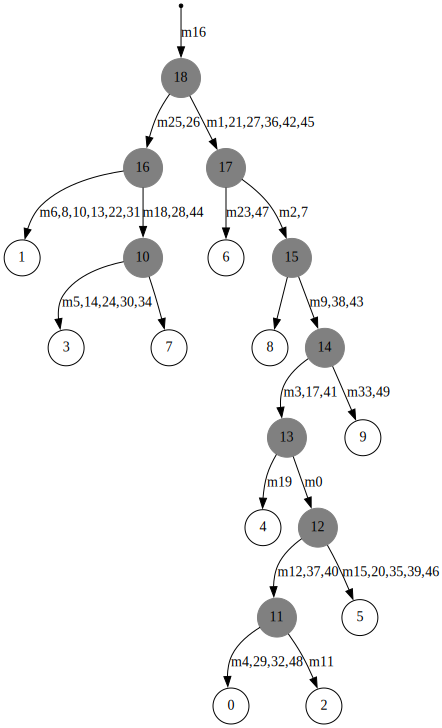

In [21]:
# Generate a random cell lineage tree with 10 samples and 50 mutations
generator = DataGenerator(10, 50)
generator.random_tree()

# Visualize the generated tree
# Cells are represented by white circles
# Ancestor cells are represented by grey circles
# Mutations are indicated on branches
generator.tree.to_graphviz()

In [22]:
# This can display the tree as a mutation tree instead, but has a bug
#from tree import MutationTree
#mut_tree = MutationTree()

In [23]:
#mut_tree.fit_structure(generator.tree)

In [24]:
# Alter the genotypes in a set of the mutation sites
# Here, 50% of the sites will be mutated
# 1/3 of the mutated sites will be homozygous for the reference allele
# 1/3 of the mutated sites will be homozygous for the alternative allele
# 1/3 of the mutated sites will be heterozygous
generator.random_mutations(mut_prop = 0.5, genotype_freq = [1/3, 1/3, 1/3])

In [25]:
# The number of mutations in the the datasets
print('the number of mutations before introducing mutations: ' + str(len(generator.gt1)))
print('the number of mutations after introducing mutations: ' + str(len(generator.gt2)))

the number of mutations before introducing mutations: 50
the number of mutations after introducing mutations: 50


In [26]:
# Print the genotype transitions
for gt1, gt2 in zip(generator.gt1, generator.gt2):
    print('%s->%s' % (gt1, gt2))

H->A
R->R
H->H
R->R
R->H
H->R
H->H
H->H
R->H
R->R
H->R
R->H
R->R
R->H
A->A
H->R
A->A
R->R
H->A
H->A
A->H
H->R
A->A
H->H
R->H
R->R
R->R
R->R
A->A
A->H
H->H
A->A
A->A
R->R
A->H
H->H
A->H
H->A
A->H
A->H
R->H
H->R
A->H
R->H
A->H
R->R
H->H
A->A
A->H
R->R


In [27]:
# Generate read counts matries for the tree data
ref, alt = generator.generate_reads()

In [28]:
ref

array([[ 0.,  9.,  6.,  3.,  8.,  3.,  3.,  5.,  9., 12.,  4.,  8.,  6.,
         7.,  0.,  0.,  0.,  7.,  4.,  5.,  1.,  6.,  0.,  3.,  6.,  3.,
         5.,  6.,  0.,  1.,  1.,  0.,  1.,  6.,  0.,  5.,  4.,  0.,  8.,
         1.,  3.,  9.,  3.,  4.,  0.,  4.,  6.,  1.,  5.,  8.],
       [ 5., 10.,  4., 13.,  4.,  7.,  3.,  5.,  1.,  4.,  8.,  3., 11.,
         2.,  0.,  5.,  1.,  6.,  4.,  3.,  0.,  2.,  1.,  6.,  7.,  8.,
         8.,  6.,  1.,  0.,  5.,  1.,  1.,  4.,  1.,  5.,  2.,  4.,  0.,
         0., 15.,  4.,  0.,  6.,  0., 12.,  4.,  1.,  2., 10.],
       [ 0., 10.,  1., 14., 10.,  4.,  7.,  7., 10.,  8.,  4.,  1.,  8.,
         3.,  0.,  3.,  0.,  5.,  3.,  6.,  1.,  8.,  1.,  6.,  9.,  3.,
         7.,  6.,  0.,  0.,  2.,  0.,  0.,  4.,  3.,  5.,  2.,  0.,  1.,
         1.,  5.,  8.,  2.,  5.,  0.,  7.,  3.,  1.,  0.,  4.],
       [ 6.,  4.,  6.,  7.,  9., 12.,  3.,  2.,  4., 11.,  5.,  5.,  6.,
         2.,  0.,  6.,  0.,  2.,  1.,  3.,  0.,  5.,  1.,  1.,  4.,  7.,
     

In [29]:
# Shape of ref and alt count matrices
print('For the matrix with ref counts, the number of cells is '+ str(ref.shape[0]) + ' and the number of mutations is ' + str(ref.shape[1]))
print('For the matrix with alt counts, the number of cells is '+ str(alt.shape[0]) + ' and the number of mutations is ' + str(alt.shape[1]))


For the matrix with ref counts, the number of cells is 10 and the number of mutations is 50
For the matrix with alt counts, the number of cells is 10 and the number of mutations is 50


In [30]:
i = 0 # cell index
j = 0 # locus index
print('Cell %d has %d reference reads and %d alternative reads at locus %d' % (i, ref[i,j], alt[i,j], j))

Cell 0 has 0 reference reads and 7 alternative reads at locus 0


In [31]:
from mutation_detection import filter_mutations, likelihood_matrices
# Calculate the posterior that a genotype change occurred in the population.
# Remove threshold so that no filtering is done, since dendro uses its own filtering
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0.5)

In [32]:
# From here continue our workflow..

# Tree inference >> trees

# Trees compared to ground truth? 
# Run MSE computation


### From prepare files for dendro

### Select mutations to be used for inference

In [33]:
from mutation_detection import filter_mutations, likelihood_matrices
# Calculate the posterior that a genotype change occurred in the population.
# Remove threshold so that no filtering is done, since dendro uses its own filtering
ref, alt, gt1, gt2 = filter_mutations(ref, alt, method = 'threshold', t = 0)

### In these sites, calculate likelihoods of each cell being mutated / not mutated

In [34]:
likelihoods1, likelihoods2 = likelihood_matrices(ref, alt, gt1, gt2)

In [35]:
print(gt1[0], gt2[0])

H A


In [36]:
i = 0
j = 0
print('Likelihood of cell %d being wildtype at locus %d is %f' % (i, j, np.exp(likelihoods1[i,j])))
print('Likelihood of cell %d being mutated at locus %d is %f' % (i, j, np.exp(likelihoods2[i,j])))

Likelihood of cell 0 being wildtype at locus 0 is 0.011338
Likelihood of cell 0 being mutated at locus 0 is 0.705768


In [37]:
likelihoods2_exp = np.exp(likelihoods2)
likelihoods2_exp
#np.exp(likelihoods1)

array([[7.05767967e-01, 1.30487942e-07, 6.40071638e-02, 1.13384119e-02,
        2.82395940e-03, 8.17022239e-01, 1.23625087e-01, 3.00591935e-01,
        6.41640555e-01, 1.73548963e-03, 1.77927235e-05, 6.36542421e-03,
        1.02411462e-01],
       [5.69948138e-05, 7.68005116e-03, 2.29542932e-01, 2.46934560e-02,
        7.71546050e-02, 4.23503130e-04, 2.04822924e-02, 1.57604051e-04,
        7.75762743e-04, 6.72788155e-01, 7.40706975e-01, 2.08708532e-03,
        3.60710322e-01],
       [7.40706975e-01, 7.91594636e-06, 6.36542421e-03, 1.22420947e-01,
        2.40489278e-02, 6.41640555e-01, 6.40071638e-02, 1.79256377e-01,
        6.72788155e-01, 8.29935935e-03, 1.28000853e-03, 2.04822924e-02,
        2.04822924e-02],
       [3.52295925e-05, 1.06667377e-02, 2.24464730e-01, 1.93504077e-01,
        5.84379889e-01, 9.40594059e-02, 1.21746644e-03, 7.18504782e-04,
        7.05767967e-01, 7.05767967e-01, 7.05767967e-01, 3.67647059e-01,
        3.97839013e-02],
       [8.17022239e-01, 7.52045507e-

In [38]:
# After filtering mutations, the shape of ref and alt count matrices. Check that no mutations were filtered out
print('For the matrix with ref counts, the number of cells is '+ str(ref.shape[0]) + ' and the number of mutations is ' + str(ref.shape[1]))
print('For the matrix with alt counts, the number of cells is '+ str(alt.shape[0]) + ' and the number of mutations is ' + str(alt.shape[1]))


For the matrix with ref counts, the number of cells is 10 and the number of mutations is 13
For the matrix with alt counts, the number of cells is 10 and the number of mutations is 13


In [39]:
# Generate files for comparison with dendro

# Get the likelihoods 
#likelihoods1_exp = np.exp(likelihoods1)
#likelihoods1_df = pd.DataFrame(likelihoods1_exp).T
#likelihoods1_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/likelihoods_ref.csv')

In [40]:
ref_df = pd.DataFrame(ref).T # ref reads
alt_df = pd.DataFrame(alt).T # alt reads
likelihoods1_df = pd.DataFrame(likelihoods1).T # wt log likelihood
likelihoods2_df = pd.DataFrame(likelihoods2).T # mut log likelihood

In [73]:
ref_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree1_ref_counts.csv', index=False)
alt_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree1_alt_counts.csv', index=False)

likelihoods1_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree1_llhood_wt.csv')
likelihoods2_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree1_llhood_mut.csv', index=False)

In [71]:
ref_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree2_ref_counts.csv')
alt_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree2_alt_counts.csv')

likelihoods1_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree2_llhood_wt.csv')
likelihoods2_df.to_csv('../../DENDRO_analysis/simulated_data_from_tigecycline/tree2_llhood_mut.csv')